Tests the Perceptron classifier a simple scenario from the iris dataset, using only two features and two types of flowers.

In [29]:
import perceptron
import adaline_gd
import adaline_sgd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

In [7]:
# Import dataset
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(s, header=None, encoding='utf-8')
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


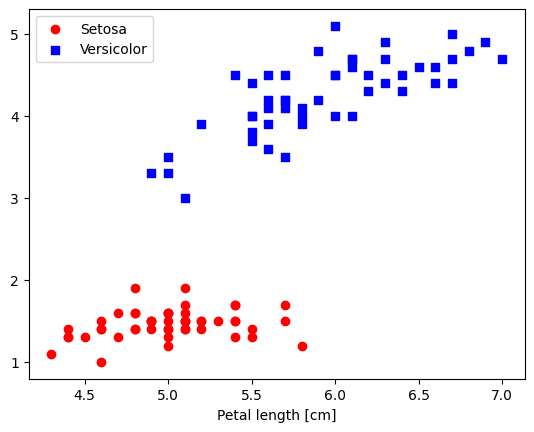

In [9]:
# Extracts only the first 100 labels that correspond to the 0-50 iris-setosa and 50-100 iris-versicolor (two classes).
# Converts each class label into either 0 (setosa) or 1 (versicolor).
# Then extract only two features (sepal length and petal length) for classification

# select setosa and versicolor
y = df.loc[0:100, 4].values
y = np.where(y == "Iris-setosa", 0, 1)

# extract sepal length and petal length
X = df.loc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1], color="red", marker="o", label="Setosa")
plt.scatter(X[50:100, 0], X[50:100, 1], color="blue", marker="s", label="Versicolor")
plt.xlabel("Sepal length [cm]")
plt.xlabel("Petal length [cm]")
plt.legend(loc="upper left")
plt.show()

# Perceptron Network

Let start with the simple Perceptron Network and see how it performs on this example.

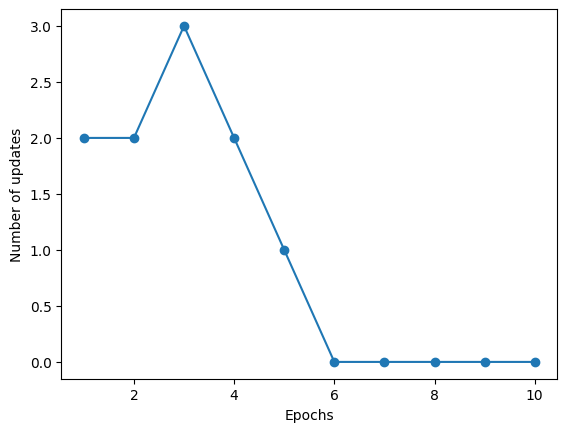

In [22]:
# Based on the previous graph it is possible to see that a linear classifier is sufficient for this problem
# Let's now train the Perceptron network for this task
ppn = perceptron.Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker="o")
plt.xlabel("Epochs")
plt.ylabel("Number of updates")
plt.show()

Notice in the previous graph that the number of errors and updates is the same, as the Perceptron network only updates the weights when it misclassified a sample.
We can also see that after the sixth iteration the Perceptron is already capable of classifying the samples perfectly.

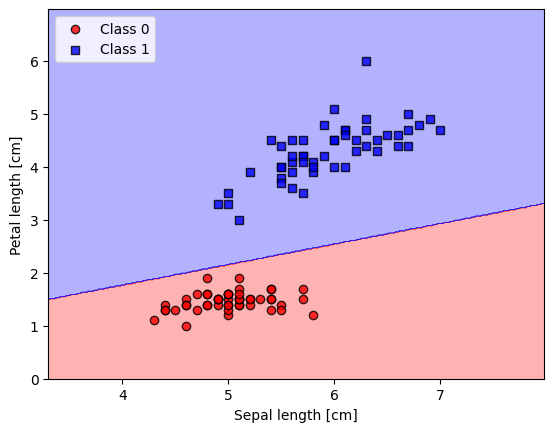

In [23]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # Converts the lab prediction label back to the original meshgrid
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')


plot_decision_regions(X, y, classifier=ppn)
plt.xlabel("Sepal length [cm]")
plt.ylabel("Petal length [cm]")
plt.legend(loc="upper left")
plt.show()

This simple perceptron network converged successfully. However, Rosenblatt proved that if two 
classes can't be separated by a linear boundary, the algorithm would never converge. In this case
some kind of stop criteria (number of iterations or number of errors) would need to be employed.

# Adaline (ADAptive LInear NEuron classifier)

Let's now compare the Perceptron network against the Adaline Network. The next cell compares Adaline performance under two different hyperparameter sets.

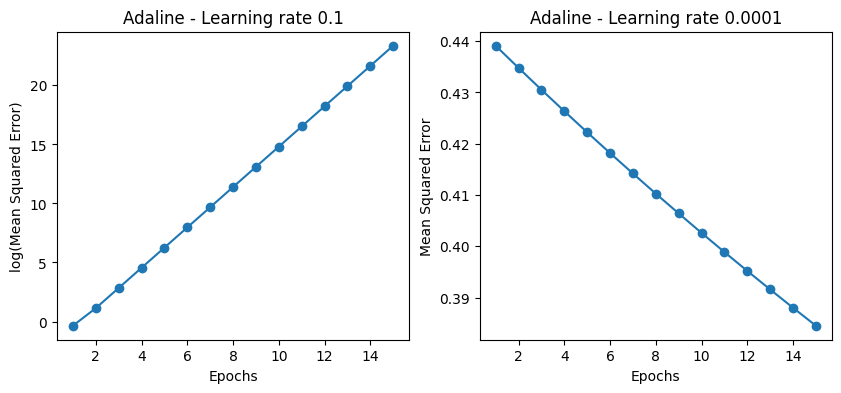

In [25]:
ada1 = adaline_gd.AdalineGD(n_iter=15, eta=0.1).fit(X, y)
ada2 = adaline_gd.AdalineGD(n_iter=15, eta=0.0001).fit(X, y)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ax[0].plot(range(1, len(ada1.losses_) + 1), np.log10(ada1.losses_), marker='o')
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("log(Mean Squared Error)")
ax[0].set_title("Adaline - Learning rate 0.1")

ax[1].plot(range(1, len(ada2.losses_) + 1), ada2.losses_, marker='o')
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Mean Squared Error")
ax[1].set_title("Adaline - Learning rate 0.0001")

plt.show()

The above graphs show two problems regarding the learning rate for the Adaline network.

The left graph shows what happens if learning rate is too big, we get the opposite effect of the 
gradient which is increasing the error rate. This happens because we overshoot the gradient steps.

The right graph shows what happens if learning rate is too small. The convergence takes too long to
reduce the error.

# Improving Gradient Descent through Feature Scaling

A popular way to scale the input features of the network is by applying standardization technique, which normalizes
the data to have mean zero and standard deviation 1. This technique works well for finding a good learning rate for
training because as all features are under the same scale, then the single learning rate will have the same effect
over all features. 

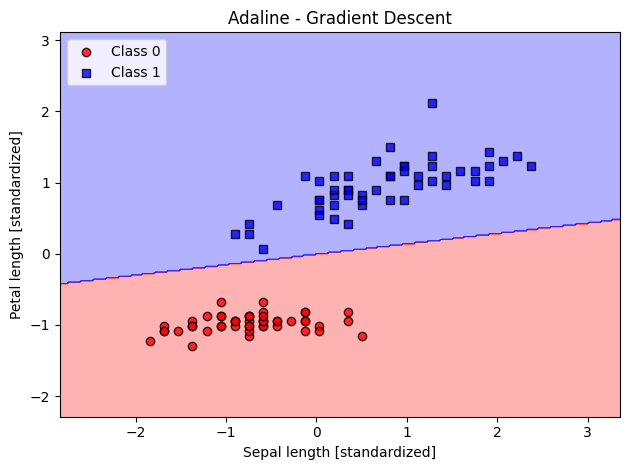

In [27]:
# Standardizing the features for training with Gradient Descent
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

ada_gd = adaline_gd.AdalineGD(n_iter=20, eta=0.5)
ada_gd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title("Adaline - Gradient Descent")
plt.xlabel("Sepal length [standardized]")
plt.ylabel("Petal length [standardized]")
plt.legend(loc="upper left")
plt.tight_layout()

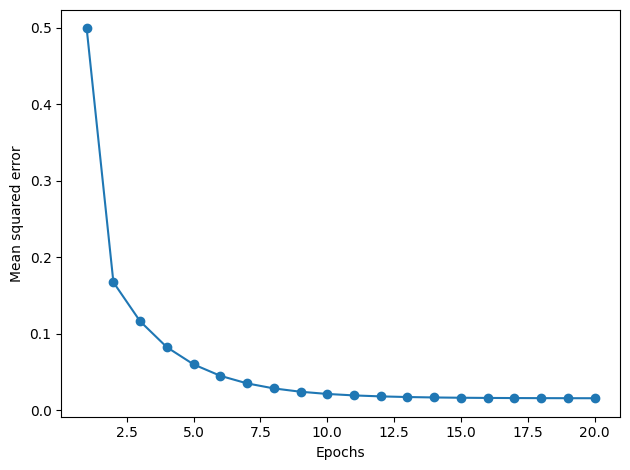

In [28]:
plt.plot(range(1, len(ada_gd.losses_) + 1), ada_gd.losses_, marker="o")
plt.xlabel("Epochs")
plt.ylabel("Mean squared error")
plt.tight_layout()
plt.show()

# Adaline SGD (Stochastic Gradient Descent)

Same implementation than Adaline GD (Gradient Descent) but allowing learning for each sample
instead of full dataset batch training.

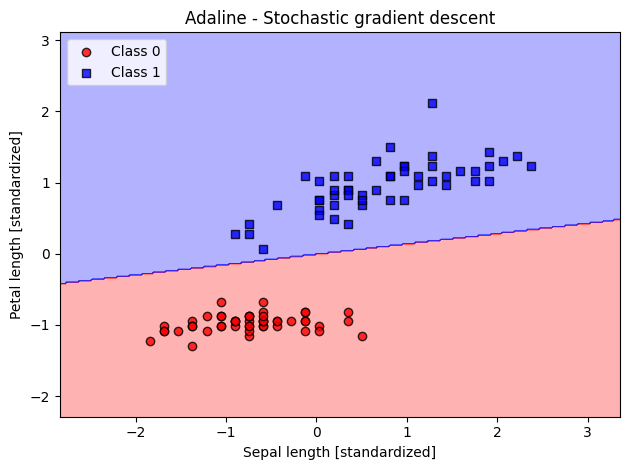

In [30]:
ada_sgd = adaline_sgd.AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic gradient descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

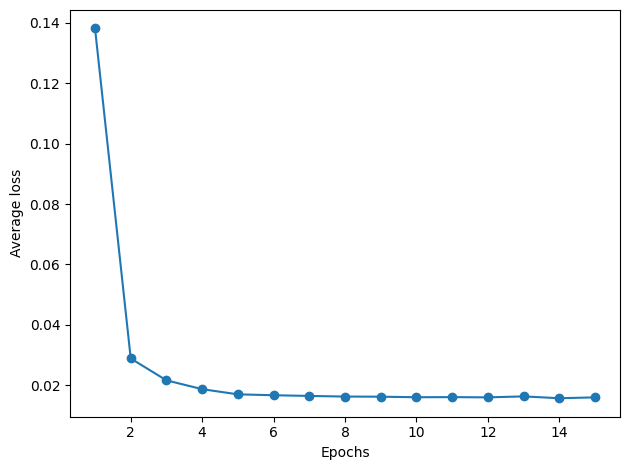

In [31]:
plt.plot(range(1, len(ada_sgd.losses_) + 1), ada_sgd.losses_, marker="o")
plt.xlabel('Epochs')
plt.ylabel('Average loss')
plt.tight_layout()
plt.show()

If we want to update our model, for example, in an online learning scenario with streaming data, 
we could simply call the partial_fit method on individual training examples—for instance, `ada_sgd.partial_fit(X_std[0, :], y[0]).`